In [16]:
import numpy as np

In [17]:
import pandas as pd

In [18]:
#uses the pandas library to read a TSV (tab-separated values) file located at '../TextFiles/smsspamcollection.tsv' into a DataFrame named df. The sep='\t' argument specifies that the file is tab-delimited.

df = pd.read_csv('../TextFiles/smsspamcollection.tsv', sep='\t')

In [19]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [20]:
#alculates and displays the total number of missing (null) values in each column of the DataFrame df

df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

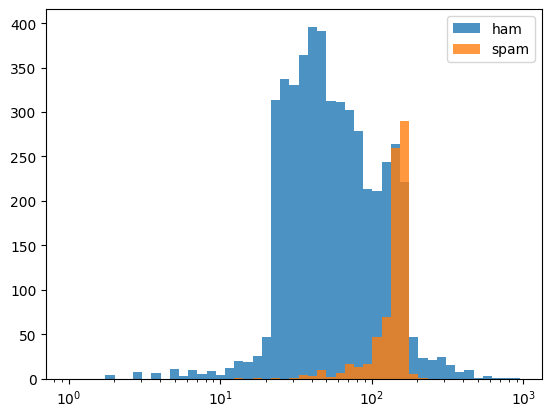

In [21]:
#The x-axis is set to a logarithmic scale to better visualize the distribution of message lengths.
#bins are created using powers of 1.15 to define bin edges, allowing for non-linear bin spacing.
#Both histograms are plotted with some transparency (alpha=0.8) to overlap clearly, and a legend distinguishes 'ham' from 'spam'.

import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [22]:
len(df)

5572

In [23]:
#returns the unique values ​​present in the 'label' column of the dataframe 'DF' in the form of an array. In other words, this code is used to check what different values ​​are in the 'Label' column.
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [24]:
df['label'].value_counts()

label
ham     4825
spam     747
Name: count, dtype: int64

In [25]:
import matplotlib.pyplot as plt

In [26]:
 %matplotlib inline

/var/folders/6y/xtl4b0cx1cs9zrr9n5y814_h0000gn/T/ipykernel_10765/2073189062.py:5: UserWarning: Legend does not support handles for str instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend('ham', 'spam')


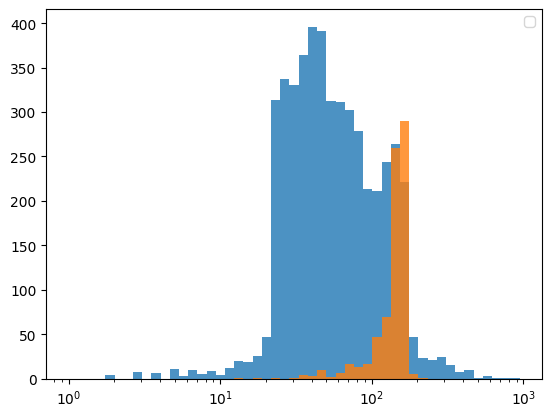

In [27]:
plt.xscale('log')
bins = 1.15**(np.arange (0,50))
plt.hist(df[df['label']=='ham']['length'], bins=bins, alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins, alpha=0.8)
plt.legend('ham', 'spam')
plt.show()

In [32]:
#train_test_split: A function to split the dataset into training and testing sets.
#LogisticRegression: The class for logistic regression model.
#LabelEncoder: Used to convert categorical string labels into numeric form.


from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

In [34]:
#X feature data
X = df[['length', 'punct']]

#y is our label
y=df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [35]:
print(y_test)

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object


In [36]:
X_train.shape

(3900, 2)

In [37]:
X_test.shape

(1672, 2)

In [38]:
y_test.shape

(1672,)

In [39]:
y_test

3245     ham
944      ham
1044     ham
2484     ham
812      ham
        ... 
2505     ham
2525    spam
4975     ham
650     spam
4463     ham
Name: label, Length: 1672, dtype: object

In [40]:
#imports the Logistic Regression class from the scikit-learn library.
from sklearn.linear_model import LogisticRegression

In [41]:
#creates an instance of the Logistic Regression model using the 'lbfgs' solver, which is an optimization algorithm effective for handling multi-class problems

lr_model = LogisticRegression(solver='lbfgs')

In [42]:
#trains the logistic regression model lr_model using the training data X_train and the corresponding labels y_train. This step allows the model to learn the relationship between features and the target classes.

lr_model.fit(X_train, y_train)

LogisticRegression()

In [43]:
from sklearn import metrics

In [44]:
#predicts the test data 'x_test' using the `LR_MODEL」 Logistics regression model. The results are stored in the 'predictions' variable and contains the prediction label of the model for the test data.
predictions = lr_model.predict(X_test)

In [45]:
predictions 

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'ham'], dtype=object)

In [74]:
#y_test

In [76]:
print(metrics.confusion_matrix(y_test, predictions))

[[1404   44]
 [ 219    5]]


In [77]:
df = pd.DataFrame(metrics.confusion_matrix(y_test,predictions), index=['ham','spam'], columns=['ham','spam'])


In [78]:
df

,ham,spam
ham,1404,44
spam,219,5


In [46]:
#prints a detailed classification report comparing the true labels y_test with the predicted labels predictions.

print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [81]:
print(metrics.accuracy_score(y_test, predictions))

0.8427033492822966


In [47]:
#MultinomialNB is a Naive Bayes classifier suitable for multinomially distributed data, commonly used for text classification tasks such as document classification based on word frequencies. This line imports the MultinomialNB class from scikit-learn.



from sklearn.naive_bayes import MultinomialNB

In [91]:
nb_model = MultinomialNB()

nb_model.fit(X_train, y_train)

predictions = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_test, predictions))

[[1438   10]
 [ 224    0]]


In [93]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

         ham       0.87      0.99      0.92      1448
        spam       0.00      0.00      0.00       224

    accuracy                           0.86      1672
   macro avg       0.43      0.50      0.46      1672
weighted avg       0.75      0.86      0.80      1672



In [96]:
from sklearn.svm import SVC

In [97]:
svc_model = SVC(gamma='auto')
svc_model.fit(X_train, y_train)

SVC(gamma='auto')

In [98]:
predictions = svc_model.predict(X_test)

In [99]:
print(metrics.confusion_matrix(y_test, predictions))

[[1373   75]
 [ 121  103]]


In [ ]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    n                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           